# Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from yellowbrick.cluster import KElbowVisualizer

In [4]:
def dunn_fast(points, labels):
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

In [3]:
bn32 = pd.read_csv("botnet32.csv")

In [7]:
bt = pd.read_csv("benign_traffic.csv")

In [6]:
k = KMeans(n_clusters=2)
k1 = k.fit(bt)
dunn_fast(bt, k1.labels_)

MemoryError: Unable to allocate array with shape (49548, 49548) and data type float64

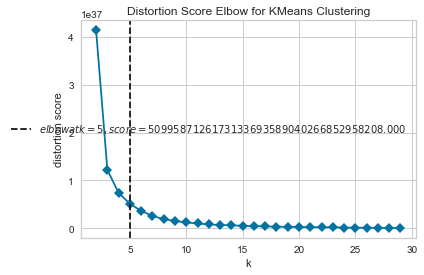

In [30]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
visualizer.fit(bt)        
visualizer.show()  

In [ ]:
df = pd.DataFrame(columns = ['Clusters', 'Davies Bouldin Index', 'Silhouette Score'])

In [49]:
k = KMeans(n_clusters=3)
k1 = k.fit(bt)

In [7]:
for i in range(2, 20):
    k = KMeans(n_clusters=i)
    k1 = k.fit(bt)
    print("Clusters =",i,"Davies Bouldin Score =",davies_bouldin_score(bt, labels = k1.labels_), "Silhouette Score =",silhouette_score(bt, labels = k1.labels_))

Clusters = 2 Davies Bouldin Score = 0.19918819544263483 Silhouette Score = 0.9950133766085033
Clusters = 3 Davies Bouldin Score = 0.37427750599838844 Silhouette Score = 0.9923626919566279
Clusters = 4 Davies Bouldin Score = 0.540960442864652 Silhouette Score = 0.9911074777831487
Clusters = 5 Davies Bouldin Score = 0.5948502392007946 Silhouette Score = 0.9903590383876943
Clusters = 6 Davies Bouldin Score = 0.5103463501566267 Silhouette Score = 0.9894302503370925
Clusters = 7 Davies Bouldin Score = 0.5181388855746174 Silhouette Score = 0.989445431523915
Clusters = 8 Davies Bouldin Score = 0.5138235019198903 Silhouette Score = 0.9887251329717661
Clusters = 9 Davies Bouldin Score = 0.49597745049306624 Silhouette Score = 0.988651841485051
Clusters = 10 Davies Bouldin Score = 0.5063137308804148 Silhouette Score = 0.9883912550933664
Clusters = 11 Davies Bouldin Score = 0.5319041920079186 Silhouette Score = 0.9881237413017152
Clusters = 12 Davies Bouldin Score = 0.537146521499963 Silhouette Sc

In [10]:
m = MeanShift()
m11 = m.fit(bt)
print("Mean Shift Clustering = ",", Davies Bouldin Score =",davies_bouldin_score(bt, labels = k1.labels_), "Silhouette Score =",silhouette_score(bt, labels = k1.labels_))

Mean Shift Clustering =  , Davies Bouldin Score = 0.35802250909525546 Silhouette Score = 0.988003286496343


In [19]:
k = DBSCAN().fit(bt)
k1 = k.fit(bt)
print("DBSCAN: Davies Bouldin Score =",davies_bouldin_score(bt, labels = k1.labels_),"Silhouette Score =",silhouette_score(bt, labels = k1.labels_))

DBSCAN: Davies Bouldin Score = 2.0946009982180667 Silhouette Score = -0.9765735689839646


In [48]:
pd.DataFrame(k1.labels_)[0].value_counts()

-1    49537
 0        6
 1        5
Name: 0, dtype: int64

In [ ]:
k = DBSCAN().fit(bt)
k1 = k.fit(bt)
print("DBSCAN: Davies Bouldin Score =",davies_bouldin_score(bt, labels = k1.labels_),"Silhouette Score =",silhouette_score(bt, labels = k1.labels_))

In [54]:
a = pd.read_csv("capture20110810.binetflow.2format")

In [55]:
b = a.dropna()
dummyList = ['Proto', 'State', 'Label']
modify = ['SrcAddr', 'DstAddr', 'StartTime', 'LastTime']

In [58]:
c = pd.get_dummies(b, columns = dummyList, drop_first = True)

In [59]:
d = c.drop(columns=modify)

In [31]:
gmm = GaussianMixture(n_components = 3) 

In [39]:
X_normalized = preprocessing.normalize(bt, norm='l2')

In [40]:
gmm.fit(X_normalized) 
gmmlabels = gmm.predict(X_normalized) 

In [41]:
print("GMM : Davies Bouldin Score =",davies_bouldin_score(X_normalized, labels = gmmlabels), "Silhouette Score =",silhouette_score(X_normalized, labels = gmmlabels))

GMM : Davies Bouldin Score = 0.5396314866914412 Silhouette Score = 0.6511184797554266


In [ ]:
X_normalized = preprocessing.normalize(bt, norm='l2')
DBS_Normalized = DBSCAN().fit(X_normalized)
DBS_DBScore = davies_bouldin_score(X_normalized, labels = DBS_Normalized.labels_)
DBS_SScore = silhouette_score(X_normalized, labels = DBS_Normalized.labels_)
print("DBSCAN: Davies Bouldin Score =",DBS_DBScore,"Silhouette Score =",DBS_SScore)